# Central Limit Theorem with Poisson Distribution

We will demonstrate the Central Limit Theorem by:
1. Drawing n numbers from a Poisson distribution
2. Computing the mean of these n numbers  
3. Repeating this process many times to build a distribution of sample means P[⟨x⟩] 

## Setup and Parameters


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for the experiment
lambda_param = 3.0  # Poisson parameter (rate)
n_sample = 30       # Number of values to draw for each sample mean
n_experiments = 1000  # Number of times to repeat the experiment

print(f"Poisson parameter λ = {lambda_param}")
print(f"Sample size n = {n_sample}")
print(f"Number of experiments = {n_experiments}")


Poisson parameter λ = 3.0
Sample size n = 30
Number of experiments = 1000


In [4]:
# Collect sample means
sample_means = []

for i in range(n_experiments):
    # Draw n numbers from Poisson distribution
    sample = np.random.poisson(lambda_param, n_sample)
    
    # Compute the mean of this sample
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sample_means = np.array(sample_means)

print(f"Generated {len(sample_means)} sample means")
print(f"Mean of sample means: {np.mean(sample_means):.4f}")
print(f"Standard deviation of sample means: {np.std(sample_means):.4f}")


Generated 1000 sample means
Mean of sample means: 2.9922
Standard deviation of sample means: 0.3137


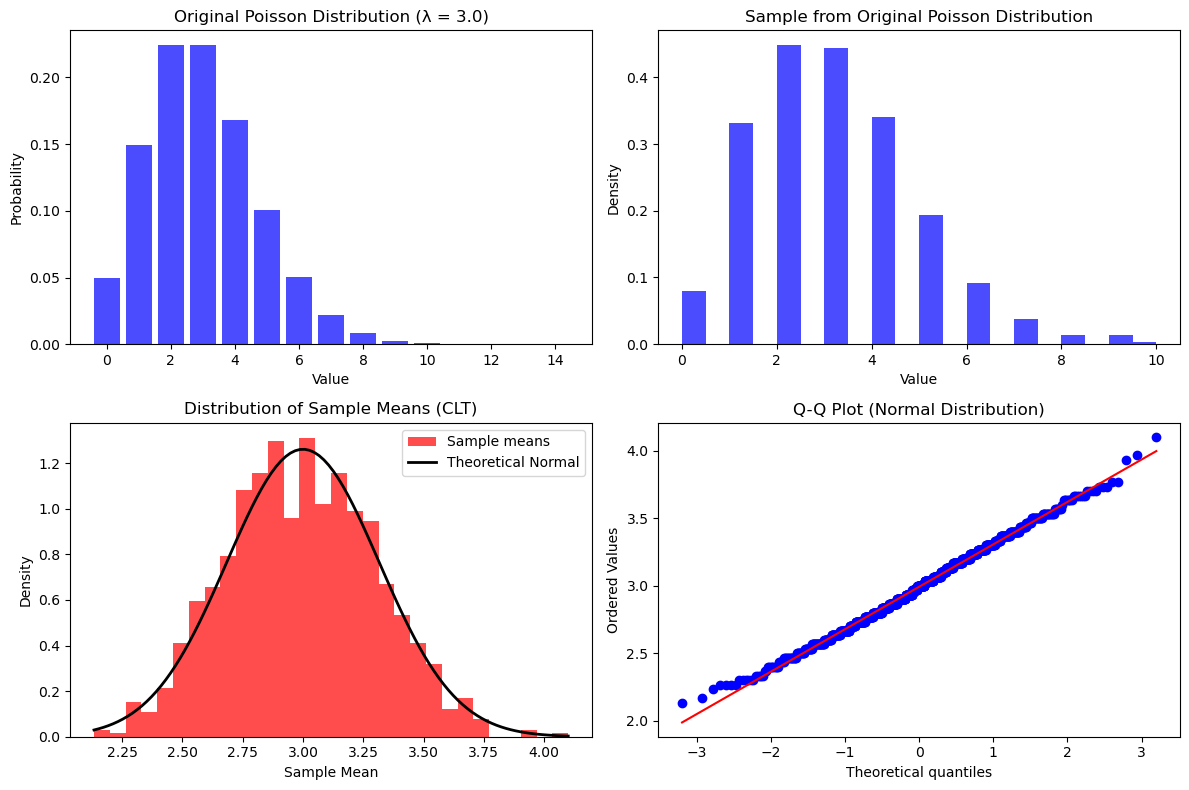

In [5]:
plt.figure(figsize=(12, 8))

# Plot 1: Original Poisson distribution
plt.subplot(2, 2, 1)
x_poisson = np.arange(0, 15)
y_poisson = stats.poisson.pmf(x_poisson, lambda_param)
plt.bar(x_poisson, y_poisson, alpha=0.7, color='blue')
plt.title(f'Original Poisson Distribution (λ = {lambda_param})')
plt.xlabel('Value')
plt.ylabel('Probability')

# Plot 2: Sample from original distribution
plt.subplot(2, 2, 2)
single_sample = np.random.poisson(lambda_param, 1000)
plt.hist(single_sample, bins=20, density=True, alpha=0.7, color='blue')
plt.title('Sample from Original Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot 3: Distribution of sample means (CLT)
plt.subplot(2, 2, 3)
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='red', label='Sample means')

# Overlay theoretical normal distribution
theoretical_mean = lambda_param  # E[X] for Poisson
theoretical_std = np.sqrt(lambda_param / n_sample)  # σ/√n for sample means
x_normal = np.linspace(sample_means.min(), sample_means.max(), 100)
y_normal = stats.norm.pdf(x_normal, theoretical_mean, theoretical_std)
plt.plot(x_normal, y_normal, 'k-', linewidth=2, label='Theoretical Normal')

plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()

# Plot 4: Q-Q plot to check normality
plt.subplot(2, 2, 4)
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')

plt.tight_layout()
plt.show()


In [6]:
# Central Limit Theorem predictions
print("=== Central Limit Theorem Predictions ===")
print(f"Original Poisson distribution: λ = {lambda_param}")
print(f"  Mean: E[X] = {lambda_param}")
print(f"  Variance: Var[X] = {lambda_param}")
print(f"  Standard deviation: σ = {np.sqrt(lambda_param):.4f}")
print()

print("=== Distribution of Sample Means (CLT) ===")
theoretical_mean_of_means = lambda_param
theoretical_std_of_means = np.sqrt(lambda_param / n_sample)
print(f"Theoretical mean of sample means: {theoretical_mean_of_means:.4f}")
print(f"Theoretical std of sample means: {theoretical_std_of_means:.4f}")
print()

print("=== Empirical Results ===")
empirical_mean = np.mean(sample_means)
empirical_std = np.std(sample_means)
print(f"Empirical mean of sample means: {empirical_mean:.4f}")
print(f"Empirical std of sample means: {empirical_std:.4f}")
print()

print("=== Comparison ===")
print(f"Mean difference: {abs(theoretical_mean_of_means - empirical_mean):.4f}")
print(f"Std difference: {abs(theoretical_std_of_means - empirical_std):.4f}")

# Test for normality
shapiro_stat, shapiro_p = stats.shapiro(sample_means)
print(f"Shapiro-Wilk test for normality: p-value = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Sample means appear to be normally distributed (p > 0.05)")
else:
    print("Sample means may not be perfectly normal (p < 0.05)")


=== Central Limit Theorem Predictions ===
Original Poisson distribution: λ = 3.0
  Mean: E[X] = 3.0
  Variance: Var[X] = 3.0
  Standard deviation: σ = 1.7321

=== Distribution of Sample Means (CLT) ===
Theoretical mean of sample means: 3.0000
Theoretical std of sample means: 0.3162

=== Empirical Results ===
Empirical mean of sample means: 2.9922
Empirical std of sample means: 0.3137

=== Comparison ===
Mean difference: 0.0078
Std difference: 0.0025
Shapiro-Wilk test for normality: p-value = 0.0201
Sample means may not be perfectly normal (p < 0.05)


In [ ]:
def weird_trimodal_distribution(size):
    """A crazy trimodal distribution with three distinct peaks"""
    choice = np.random.choice([0, 1, 2], size=size, p=[0.3, 0.4, 0.3])
    samples = np.zeros(size)
    
    # Peak 1: around -10
    mask1 = choice == 0
    samples[mask1] = np.random.normal(-10, 1.5, np.sum(mask1))
    
    # Peak 2: around 0  
    mask2 = choice == 1
    samples[mask2] = np.random.normal(0, 0.8, np.sum(mask2))
    
    # Peak 3: around 15
    mask3 = choice == 2
    samples[mask3] = np.random.normal(15, 2.0, np.sum(mask3))
    
    return samples

def weird_sawtooth_distribution(size):
    """A sawtooth-like distribution - very non-smooth"""
    # Create a sawtooth pattern
    x = np.random.uniform(0, 10, size)
    # Transform to create sawtooth density
    return np.where(x % 2 < 1, x % 2, 2 - (x % 2)) + np.random.normal(0, 0.1, size)

def weird_bimodal_gaps(size):
    """Distribution with huge gaps - only exists at specific ranges"""
    choice = np.random.choice([0, 1], size=size, p=[0.6, 0.4])
    samples = np.zeros(size)
    
    # Either around -50 or around +50 - nothing in between!
    mask1 = choice == 0
    samples[mask1] = np.random.normal(-50, 3, np.sum(mask1))
    
    mask2 = choice == 1  
    samples[mask2] = np.random.normal(50, 4, np.sum(mask2))
    
    return samples

def cauchy_distribution(size):
    """Cauchy distribution - has NO finite mean or variance! CLT should fail."""
    return np.random.standard_cauchy(size)

# Test these weird distributions
distributions = {
    'Trimodal Monster': weird_trimodal_distribution,
    'Sawtooth Chaos': weird_sawtooth_distribution, 
    'Gap-toothed Beast': weird_bimodal_gaps,
    'Cauchy (CLT Breaker)': cauchy_distribution
}

print("Testing weird distributions:")
for name, dist_func in distributions.items():
    sample = dist_func(1000)
    print(f"{name}: mean={np.mean(sample):.2f}, std={np.std(sample):.2f}, min={np.min(sample):.2f}, max={np.max(sample):.2f}")


In [ ]:
def test_clt_with_weird_distribution(dist_func, dist_name, n_sample=30, n_experiments=1000):
    """Test CLT with any weird distribution"""
    
    # Collect sample means
    sample_means = []
    
    for i in range(n_experiments):
        # Draw n numbers from the weird distribution
        if dist_name == 'Cauchy (CLT Breaker)':
            # For Cauchy, we need to be more careful about extreme values
            sample = dist_func(n_sample)
            # Clip extreme values to avoid computational issues
            sample = np.clip(sample, -100, 100)
        else:
            sample = dist_func(n_sample)
        
        # Compute the mean
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    sample_means = np.array(sample_means)
    
    # Remove any NaN or infinite values
    sample_means = sample_means[np.isfinite(sample_means)]
    
    return sample_means

# Let's test the weirdest one: the Trimodal Monster!
print("Testing CLT with the Trimodal Monster Distribution...")
trimodal_means = test_clt_with_weird_distribution(weird_trimodal_distribution, 'Trimodal Monster')

print(f"Distribution of sample means from Trimodal Monster:")
print(f"  Mean: {np.mean(trimodal_means):.4f}")  
print(f"  Std: {np.std(trimodal_means):.4f}")
print(f"  Min: {np.min(trimodal_means):.4f}")
print(f"  Max: {np.max(trimodal_means):.4f}")


In [ ]:
# Now let's visualize ALL the weird distributions and their CLT behavior
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
fig.suptitle('Central Limit Theorem with Weird Distributions', fontsize=16)

for i, (name, dist_func) in enumerate(distributions.items()):
    
    # Original distribution
    ax1 = axes[i, 0]
    original_sample = dist_func(5000)
    if name == 'Cauchy (CLT Breaker)':
        # Clip Cauchy for visualization
        original_sample = np.clip(original_sample, -50, 50)
    
    ax1.hist(original_sample, bins=50, density=True, alpha=0.7, color='blue')
    ax1.set_title(f'Original: {name}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    
    # Sample means distribution (CLT)
    ax2 = axes[i, 1]
    sample_means = test_clt_with_weird_distribution(dist_func, name)
    
    if len(sample_means) > 0:
        ax2.hist(sample_means, bins=30, density=True, alpha=0.7, color='red')
        
        # Try to overlay normal curve (except for Cauchy)
        if name != 'Cauchy (CLT Breaker)' and np.std(sample_means) > 0:
            x_norm = np.linspace(sample_means.min(), sample_means.max(), 100)
            y_norm = stats.norm.pdf(x_norm, np.mean(sample_means), np.std(sample_means))
            ax2.plot(x_norm, y_norm, 'k-', linewidth=2, label='Normal fit')
            ax2.legend()
    
    ax2.set_title(f'Sample Means: {name}')
    ax2.set_xlabel('Sample Mean')
    ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
def ultimate_weird_distribution(size):
    """The most bizarre distribution imaginable"""
    samples = np.zeros(size)
    
    for i in range(size):
        # Random choice of completely different behaviors
        choice = np.random.random()
        
        if choice < 0.2:
            # Spike at exactly π
            samples[i] = np.pi + np.random.normal(0, 0.01)
        elif choice < 0.3:
            # Negative exponential decay
            samples[i] = -np.random.exponential(scale=5)
        elif choice < 0.4:
            # Square wave pattern
            samples[i] = 100 if (i % 10) < 5 else -100
        elif choice < 0.6:
            # Random integers only
            samples[i] = np.random.randint(-20, 21)
        elif choice < 0.8:
            # Logarithmic values
            samples[i] = np.log(np.random.uniform(1, 1000))
        else:
            # Pure chaos - uniform between crazy ranges
            samples[i] = np.random.uniform(-1000, 1000)
    
    return samples

# Test this monster
print("=== THE ULTIMATE WEIRD DISTRIBUTION ===")
ultimate_sample = ultimate_weird_distribution(10000)
print(f"Mean: {np.mean(ultimate_sample):.2f}")
print(f"Std: {np.std(ultimate_sample):.2f}")
print(f"Unique values in first 100: {len(np.unique(ultimate_sample[:100]))}")

# Test CLT with this beast
ultimate_means = test_clt_with_weird_distribution(ultimate_weird_distribution, 'Ultimate Weird')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(ultimate_sample, bins=100, density=True, alpha=0.7, color='purple')
plt.title('The Ultimate Weird Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
plt.hist(ultimate_means, bins=30, density=True, alpha=0.7, color='orange')
# Overlay normal distribution
if len(ultimate_means) > 0 and np.std(ultimate_means) > 0:
    x_norm = np.linspace(ultimate_means.min(), ultimate_means.max(), 100)
    y_norm = stats.norm.pdf(x_norm, np.mean(ultimate_means), np.std(ultimate_means))
    plt.plot(x_norm, y_norm, 'k-', linewidth=2, label='Normal Approximation')
    plt.legend()
plt.title('Sample Means (CLT Magic!)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(ultimate_means, dist="norm", plot=plt)
plt.title('Q-Q Plot: How Normal?')

plt.tight_layout()
plt.show()

print(f"\nCLT Results for Ultimate Weird Distribution:")
print(f"Sample means - Mean: {np.mean(ultimate_means):.4f}, Std: {np.std(ultimate_means):.4f}")

# Test normality
shapiro_stat, shapiro_p = stats.shapiro(ultimate_means[:5000])  # Shapiro-Wilk has size limits
print(f"Shapiro-Wilk test p-value: {shapiro_p:.6f}")
print("CLT works even with this chaos!" if shapiro_p > 0.01 else "Even this might be too weird for CLT!")
